# Programación para Análisis de datos

## Análisis de datos bivariado. Parte I

Incluye tablas de contingencia, tablas dinámicas, visualizaciones entre categóricas y entre categóricas y numéricas, así como análisis de correlación
En otros notebooks se verán: ANOVA, pruebas de hipótesis, regresión y otras técnicas

## Caso: Veterans' Administration Lung Cancer study

### Mtra. Gisel Hernández Chávez

Ensayo aleatorizado de dos regímenes de tratamiento para el cáncer de pulmón. Este es un conjunto de datos de análisis de supervivencia estándar.https://rdrr.io/cran/survival/man/veteran.html

__Sigificado de los campos__

__trt__:	1=standard 2=test  Dos tipos de tratamiento para el ensayo clínico / nominal

__celltype__:	1=squamous, 2=smallcell, 3=adeno, 4=large     / nominal

__time__:	survival time   (días de supervivencia)           / razón

__status__:	censoring status  / nominal

__karno__:	Karnofsky performance score (100=good)       / ordinal (algunos pueden considerarlo de intervalo) Por ejemplo: el mismo oncólogo fue el que determinó el karno de cada paciente.

    A standard way of measuring the ability of cancer patients to perform ordinary tasks. The Karnofsky Performance Status scores range from 0 to 100. A higher score means the patient is better able to carry out daily activities.

    "The scoring is subjectively assigned by a health professional based on the following hierarchical scale: 100=normal, no evidence of disease; 90=able to perform normal activity with only minor symptoms; 80=normal activity with effort, some symptoms; 70=able to care for self but unable to do normal activities; 60=requires occasional assistance, care for most needs; 50=requires considerable assistance; 40=disabled, requires special assistance; 30=severely disabled; 20=very sick, requires active supportive treatment; 10=moribund. Intermediate or even decimal scores can be assigned. The tool is named after David A. Karnofsky, who described the scale in 1949."(Ferrucci et.all,2007)

    <div class="csl-entry">Ferrucci, L., Koh, C., Bandinelli, S., &#38; Guralnik, J. M. (2007). Disability, Functional Status, and Activities of Daily Living. <i>Encyclopedia of Gerontology</i>, 427–436. https://doi.org/10.1016/B0-12-370870-2/00075-5</div>

__diagtime__:	months from diagnosis to randomisation   / razón

__age__:	in years                    /razón

__prior__:	prior therapy 0=no, 10=yes  / nominal

__Source__
D Kalbfleisch and RL Prentice (1980), The Statistical Analysis of Failure Time Data. Wiley, New York.

## Preguntas de investigación iniciales

1. ¿Qué grupo de tratamiento tiene mayor tasa de supervivencia después de 1 año (365 días)?
2. ¿Cuál es el estimado de supervivencia de los veteranos, independientemente del tratamiento, a través de los primeros 200 días?
3. ¿Puedo predecir con una precisión mayor al 60% si un paciente muere o no antes de 1000 días? Esta es una pregunta de clasificación. La variable dependiente es binaria y se puede resolver, entre otras técnicas con regresión logística o árboles.
4. ¿Puedo predecir con más de 0.65 de concordancia la probabilidad y el riesgo de supervivencia de un veterano en un tiempo dado,  conociendo 'trt', 'celltype', 'karno', 'diagtime', 'age' y 'prior'? Aquí son variables dependientes continuas y se usan otros tipos de regresiones.

### Unidad de observación

+ Cada fila de la tabla: veterano con cáncer de pulmón ...

### Unidad de análisis

| __Pregunta de investigación__ | __Unidad de análisis__ |
| --------------------------------------------------- | ------------------ | 
| Qué trt tiene mayor superv. después 1 año?                              | grupo tratamiento |  
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia a los 1000 días (1/0) | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia en 200 días | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Modelo supervivencia de veterano concordancia >0.65 | veterano           | 


## ¿Qué es el análisis bivariado?

El análisis bivariado es una de las formas más simples de análisis cuantitativo (estadístico).Implica el análisis de dos variables (a menudo denominadas X, Y), con el fin de determinar la relación empírica entre ellas.

+ Puede ser útil para probar hipótesis simples de asociación. 
+ Puede ayudar a determinar en qué medida es más fácil conocer y predecir el valor de una variable (variable dependiente) si conocemos el valor de la otra variable (variable independiente) 
+ Puede contrastarse con el análisis univariado en el que solo se analiza una variable.
+ Al igual que el análisis univariado, __puede ser descriptivo o inferencial__. 

El análisis bivariado es un caso especial (dos variables) de análisis multivariado, donde múltiples relaciones entre múltiples variables se examinan simultáneamente.

### Algunas diferencias entre análisis univariado y bivariado
__Análisis univariado__:

1. Involucra a una sola variable
2. No se aplica para analizar relaciones entre variables, sean o no causales
3. Su principal propósito es descriptivo y se calculan medidas de tendencia central, de dispersión 
4. Es común determinar y graficar las distribuciones de frecuencia
5. Para el análisis univariado gráfico se emplean: gráficas de barra, histogramas, gráficas de pie, de líneas, de cajas y bigotes. 
6. Ejemplo de pregunta de investigación: ¿Cuántos pacientes de cada tipo de célula hay en la muestra, de manera que podamos determinar si la misma está balanceada por este criterio?

__Análisis bivariado__:

1. Involucra a dos variables que se analizan simultáneamente 
2. Puede usarse para análisis de relaciones, sean o no causales.
3. Tiene tanto propósitos descriptivos como inferenciales.
4. Puede responder a preguntas de relación entre variables, sean o no causales.
5. Utiliza técnicas de análisis de correlación, pruebas de hipótesis, análisis de regresión, etc.
6. Es común determinar y graficar las distribuciones conjuntas
7. Emplea tablas de contingencia para analizar frecuencia y porcentaje de elementos en la muestra  si hay variables categóricas.
8. Ejemplo de pregunta de investigación: ¿Existe una fuerte relación entre el tipo de célula cancerígena y el tiempo de supervivencia de un paciente de cáncer de pulmón?

### Algunas discrepancias entre los científicos

Por ejemplo, ANOVA es una técnica que unos consideran univariada porque tiene una sola variable dependiente. Otros la consideran bivariada porque se requieren al menos dos grupos de muestras de la variable dependiende y para la separación en grupos se requiere una variable categórica (por lo que de esta manera interviene una segunda variable). En este curso la vamos a aplicar dentro del análisis bivariado.

Otro ejemplo es el análisis de una variable en el tiempo para un sujeto (serie de tiempo) que algunos consideran como univariado.

En otras palabras, cuando vean el uso del término univariado en la literatura, deben ver si lo están considerando así porque hay una sola variable dependiente o porque ghay una sola independiente o porque no se analizan relaciones sino que se está describiendo a una sola variable.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import phik

In [5]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
!jupyter nbextension enable --py widgetsnbextension

In [7]:
df = pd.read_csv('dataset-25346_dum.csv',encoding='utf-8')
# 'latin-1'

In [8]:
df_backup = df.copy()

In [9]:
df

,trt,prior,celltype,trt.1,prior.1,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10,celltype_large.1,celltype_smallcell.1,celltype_squamous.1
0,1,0,squamous,1,0,72,60,7,69,0,0,0,1,1,0,0,0,1
1,1,10,squamous,1,10,411,70,5,64,0,0,0,1,1,1,0,0,1
2,1,0,squamous,1,0,228,60,3,38,0,0,0,1,1,0,0,0,1
3,1,10,squamous,1,10,126,60,9,63,0,0,0,1,1,1,0,0,1
4,1,10,squamous,1,10,118,70,11,65,0,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,0,large,2,0,133,75,1,65,1,1,0,0,1,0,1,0,0
133,2,0,large,2,0,111,60,5,64,1,1,0,0,1,0,1,0,0
134,2,10,large,2,10,231,70,18,67,1,1,0,0,1,1,1,0,0
135,2,0,large,2,0,378,80,4,65,1,1,0,0,1,0,1,0,0


In [10]:
# Lista de nombres de columnas
col = df.columns
col

Index(['trt', 'prior', 'celltype', 'trt.1', 'prior.1', 'time', 'karno',
       'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10', 'celltype_large.1',
       'celltype_smallcell.1', 'celltype_squamous.1'],
      dtype='object')

## Contenido de los dataframes df y df_dum

+ df contiene todas las columnas guardadas en el análisis univariado (originales, logtime y dummies)
+ df_dum no teiene las categ´ricas originales 'trt', 'prior', 'celltype'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trt                   137 non-null    int64 
 1   prior                 137 non-null    int64 
 2   celltype              137 non-null    object
 3   trt.1                 137 non-null    int64 
 4   prior.1               137 non-null    int64 
 5   time                  137 non-null    int64 
 6   karno                 137 non-null    int64 
 7   diagtime              137 non-null    int64 
 8   age                   137 non-null    int64 
 9   trt_2                 137 non-null    int64 
 10  celltype_large        137 non-null    int64 
 11  celltype_smallcell    137 non-null    int64 
 12  celltype_squamous     137 non-null    int64 
 13  status_1              137 non-null    int64 
 14  prior_10              137 non-null    int64 
 15  celltype_large.1      137 non-null    in

In [12]:
df_dum = df.drop(['trt', 'prior', 'celltype'],axis=1)

In [13]:
# Para df_dum
nominales = ['trt_2', 'celltype_large', 'celltype_smallcell', 'celltype_squamous', 'status_1','prior_10']
ordinales = []  
intervalo = ['karno']
razon = ['time', 'diagtime', 'age']

## Análisis bivariado visual y no visual

Para lo visual puede usar como guía las siguientes imágenes

<div>
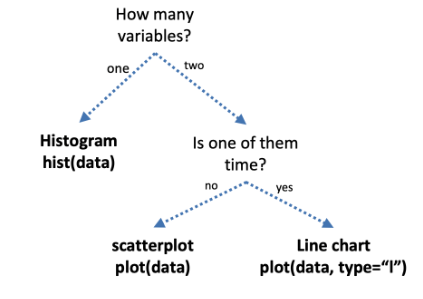
</div>

SI BIEN ESTA GRÁFICA AYUDA, NO ES DEL TODO COMPLETA

### Diagramas de dispersión (scatter plots) para todos los pares de variables con pairplot()

+ En la diagonal principal- se muestran los diagramas de densidad

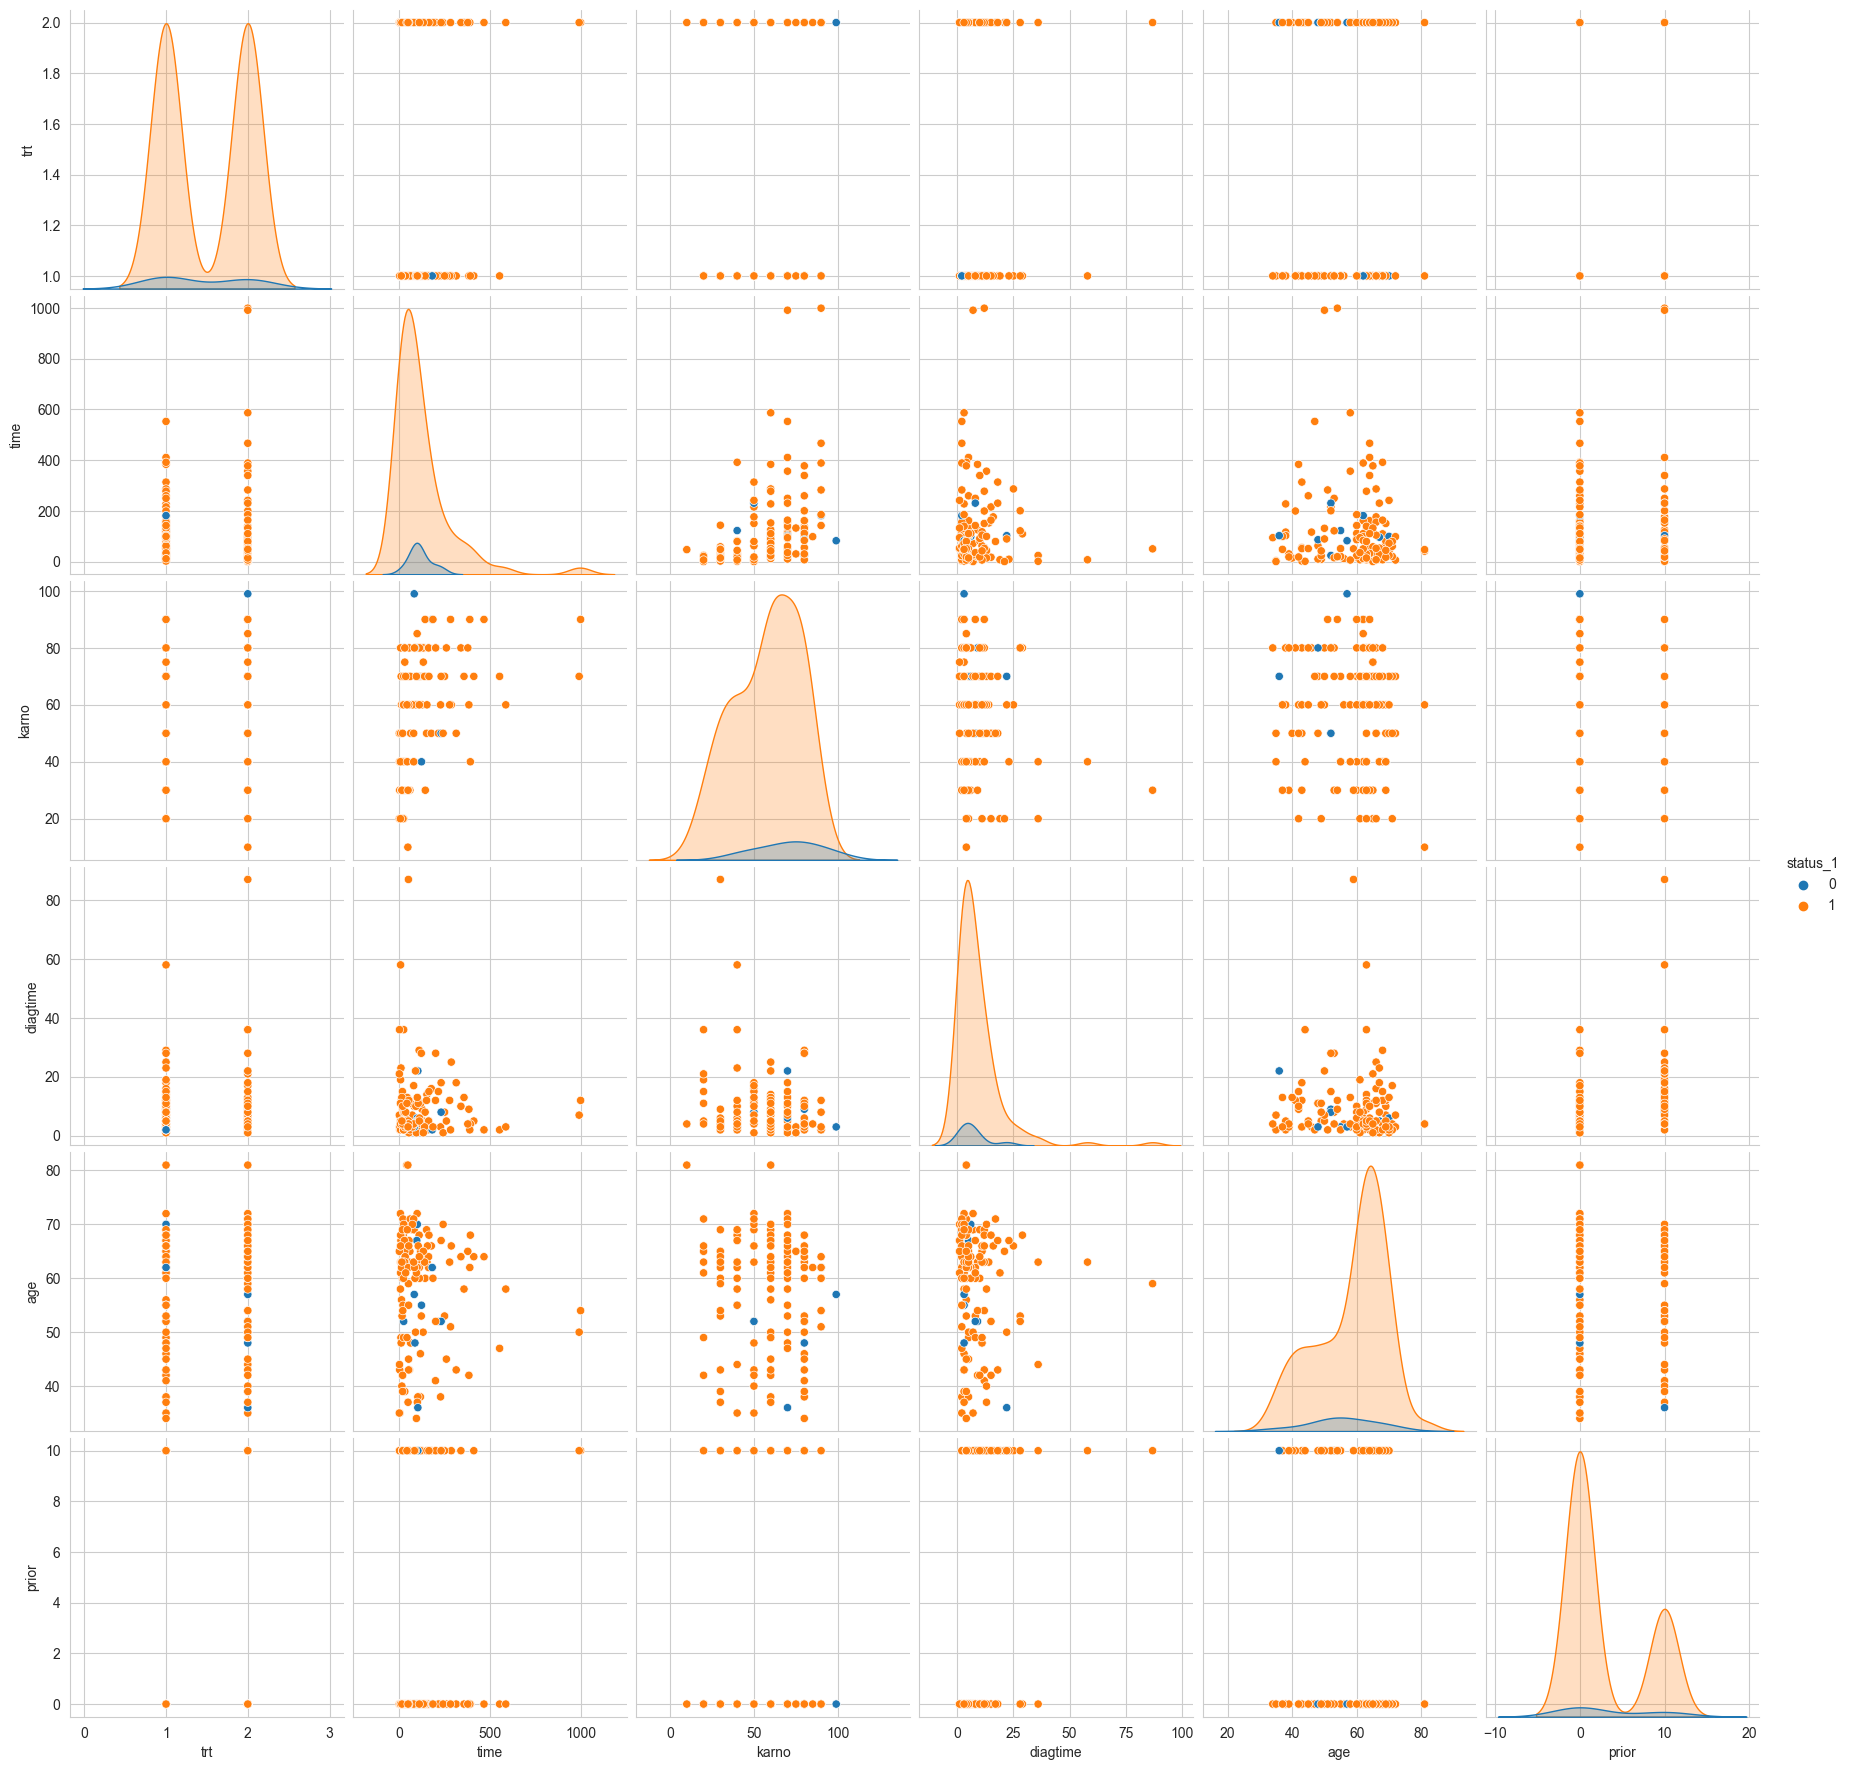

In [14]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data=df[['trt', 'celltype', 'time', 'status_1', 'karno', 'diagtime', 'age',
       'prior']], hue='status_1', height=3)
plt.show()

### Interpretación

+ Los puntos azules son los pacientes censurados, porque se salieron del estudio o porque al finalizar el mismo no habían fallecido. Son muy pocos casos.
+ No hay distribuciones claramente normales en el caso de las variables continuas, ni hay relaciones lineales claras entre las variables continuas

In [15]:
df.columns

Index(['trt', 'prior', 'celltype', 'trt.1', 'prior.1', 'time', 'karno',
       'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10', 'celltype_large.1',
       'celltype_smallcell.1', 'celltype_squamous.1'],
      dtype='object')

### Covarianza

En probabilidad y estadística, la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión.

In [16]:
df_dum = df_dum[['time', 'karno', 'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10']]
df_dum

,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10
0,72,60,7,69,0,0,0,1,1,0
1,411,70,5,64,0,0,0,1,1,1
2,228,60,3,38,0,0,0,1,1,0
3,126,60,9,63,0,0,0,1,1,1
4,118,70,11,65,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
132,133,75,1,65,1,1,0,0,1,0
133,111,60,5,64,1,1,0,0,1,0
134,231,70,18,67,1,1,0,0,1,1
135,378,80,4,65,1,1,0,0,1,0


In [17]:
cov = df_dum.cov().round(2)
cov

,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10
time,24906.12,1206.85,-77.74,-113.67,3.29,8.83,-17.63,20.22,0.47,6.76
karno,1206.85,401.59,-39.07,-20.07,-0.32,1.28,-1.77,0.59,-0.82,-0.54
diagtime,-77.74,-39.07,112.62,-3.74,0.06,-0.12,0.17,0.58,0.13,2.02
age,-113.67,-20.07,-3.74,111.13,0.41,-0.41,0.55,0.04,0.19,-0.48
trt_2,3.29,-0.32,0.06,0.41,0.25,-0.01,-0.04,0.02,0.00,-0.01
celltype_large,8.83,1.28,-0.12,-0.41,-0.01,0.16,-0.07,-0.05,0.01,0.02
celltype_smallcell,-17.63,-1.77,0.17,0.55,-0.04,-0.07,0.23,-0.09,0.00,-0.02
celltype_squamous,20.22,0.59,0.58,0.04,0.02,-0.05,-0.09,0.19,-0.01,0.03
status_1,0.47,-0.82,0.13,0.19,0.00,0.01,0.00,-0.01,0.06,-0.00
prior_10,6.76,-0.54,2.02,-0.48,-0.01,0.02,-0.02,0.03,-0.00,0.21


### Correlación

__La correlación es un análisis bivariado que mide la fuerza de la asociación entre dos variables y la dirección de la relación__. En cuanto a la fuerza de la relación, el valor del coeficiente de correlación varía entre +1 y -1. Un valor de ± 1 indica un perfecto grado de asociación entre las dos variables. A medida que el valor del coeficiente de correlación se acerque a 0, la relación entre las dos variables será más débil. La dirección de la relación está indicada por el signo del coeficiente; un signo + indica una relación positiva y un signo – indica una relación negativa. Por lo general, en estadística, medimos cuatro tipos de correlaciones: correlación de Pearson, correlación de rango de Kendall, correlación de Spearman y correlación Point-Biserial. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

+ La correlación de __Pearson__ mide el grado de __relación lineal__ entre dos variables. Es adecuado entre variables __ordinales continuas__.
+ El coeficiente de __Spearman__ es apropiado para variables __ordinales continuas y discretas__.
+ El __coeficiente de correlación de rango de Spearman__ entre dos variables es igual a la correlación de Pearson entre los valores de rango de esas dos variables. Mientras que la correlación de Pearson evalúa las relaciones lineales, la correlación de Spearman evalúa las relaciones monótonas (ya sean lineales o no). Si no hay valores de datos repetidos, se produce una correlación de Spearman perfecta de +1 o −1 cuando cada una de las variables es una función monótona perfecta de la otra. La correlación de Spearman será alta cuando las observaciones tengan un rango similar (es decir, etiqueta de posición relativa de las observaciones dentro de la variable: 1.°, 2.°, 3.°, etc.) entre las dos variables, y bajo cuando las observaciones tienen un rango diferente (o completamente opuesto para una correlación de −1) entre las dos variables.
+ El __coeficiente de correlación de rango de Kendall__ (coeficiente τ de Kendall), es una estadística utilizada para medir la asociación ordinal entre dos cantidades medidas.

"..podemos ver que Pearson y Spearman son más o menos iguales, pero Kendall es muy diferente. Esto se debe a que Kendall es una prueba de fuerza de dependencia (es decir, uno podría escribirse como una función lineal del otro), mientras que Pearson y Spearman son casi equivalentes en la forma en que correlacionan los datos normalmente distribuidos. Todas estas correlaciones son correctas en su resultado, solo que Pearson/Spearman están mirando los datos de una manera y Kendall de otra." https://ademos.people.uic.edu/Chapter22.html#:~:text=we%20can%20see%20pearson%20and,they%20correlate%20normally%20distributed%20data.
+ La __Correlación Punto-Biserial__ es un caso especial de la Correlación de Pearson y se utiliza cuando se desea medir la relación entre una variable continua y una variable dicotómica, o una que tiene dos valores (es decir, masculino/femenino, sí/no, verdadero/ FALSO).

+ __Phi__ representa la correlación entre dos variables dicotómicas. Al igual que con el punto biserial, calcular la correlación de Pearson para dos variables dicotómicas es lo mismo que el phi.
+ + __Phik (𝜙k)__ es un coeficiente de correlación nuevo y práctico que funciona consistentemente entre variables categóricas, ordinales y de intervalo, __captura la dependencia no lineal__ y usa el coeficiente de correlación de Pearson en el caso de una distribución de entrada normal bivariada.
+ La __V de Cramer__ se usa para examinar la __asociación entre dos variables categóricas cuando la contingencia es de más de 2 X 2__ (por ejemplo, 2 X 3). En estos diseños más complicados, phi no es apropiado, pero la estadística de Cramer sí lo es. 

#### Resumiendo:
+ El coeficiente de correlación de Pearson no es bueno para variables categóricas
+ El coeficiente de correlación phik es adecuado para todo tipo de variables

In [18]:
#pd.DataFrame.corr?

<AxesSubplot: >

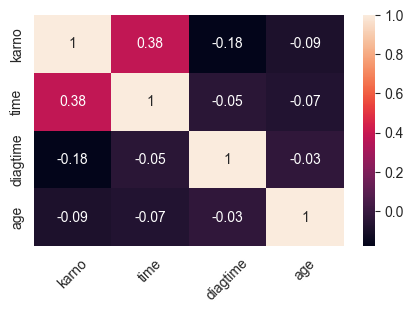

In [19]:
# Aquí se está aplicando Pearson a todas
corrPearson_dum = df_dum[intervalo + razon].corr()  # Pearson es conveniente para variables de intervalo y razón
fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(corrPearson_dum.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

<AxesSubplot: >

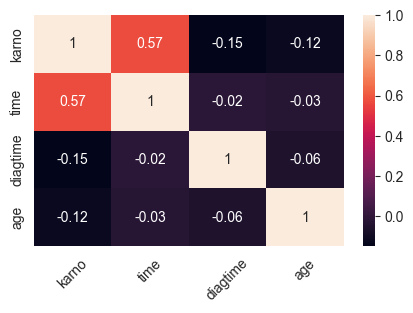

In [20]:
corrSpearman = df_dum[intervalo + razon].corr(method='spearman')  # Con Pearson solo para variables de intervalo y razón
fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(corrSpearman.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

<AxesSubplot: >

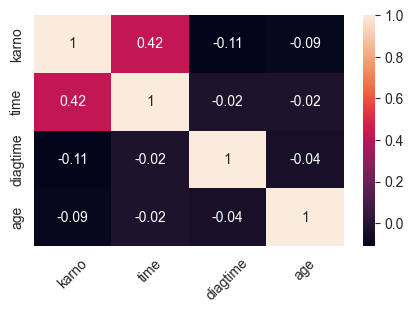

In [21]:
corrKendall = df_dum[intervalo + razon].corr(method='kendall')  # Con Pearson solo para variables de intervalo y razón

fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(corrKendall.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

### Interpretación
+ No existe fuerte correlación entre ningún par de variables ordinales candidatas a predictoras (karno, diagtime y age). Estamos considerando que son fuertes si son mayores que 0.6
+ Con time, que será nuestra variable dependiente en algunas preguntas de investigación, observamos que karno es con la que tiene mayor relación, sobre todo cuando usamos Spearman (crecen conjuntamente, aunque no necesariamente de forma lineal, pero sí monótonamente creciente en este caso por ser 0.57). Pearson mide relación lineal y es solo de 0.38

In [22]:
import phik
from phik import resources, report

In [23]:
#df_dum.phik_matrix?

In [24]:
# get the phi_k correlation matrix between all variables

pm = df_dum.phik_matrix(interval_cols = ['time', 'karno', 'diagtime', 'age'] )

<AxesSubplot: >

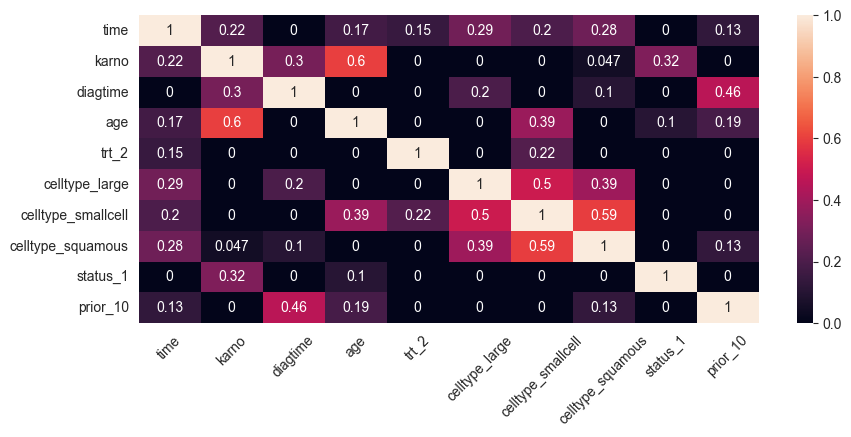

In [25]:
fig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(pm.round(3),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

### Interpretación
+ Existe fuerte correlación entre celltype_small y celltype_squamous y entre karno y age??????


### Análisis bivariado entre categóricas

Veremos el uso de las __tablas de contingencia__ y las gráficas empleadas para su visualización

Una __tabla de contingencia__ es un tipo de tabla que resume la relación entre dos variables categóricas.

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]

Calcula una tabulación cruzada de dos o más grupos (en R se llaman factores). Por defecto su salida es una tabla de frecuencias, a menos que se le pase un arreglo de valores y una función de agregación.

Los valores se pueden mostrar normalizados (proporciones)

In [26]:
# Crear todas las combinaciones entre categóricas no dummies

from itertools import permutations
perm_sin_rep = [i for i in permutations(['trt','celltype','prior_10','status_1'],r =2)]

output = set(map(lambda x: tuple(sorted(x)),perm_sin_rep))
output

{('celltype', 'prior_10'),
 ('celltype', 'status_1'),
 ('celltype', 'trt'),
 ('prior_10', 'status_1'),
 ('prior_10', 'trt'),
 ('status_1', 'trt')}

In [27]:
pd.crosstab(index=df['celltype'], columns=df['prior_10'])

prior_10,0,1
celltype,,
adeno,22,5
large,17,10
smallcell,37,11
squamous,21,14


### Tablas de contingencia para todas las combinaciones

+ Podemos usar el argumento margins=True para agregar los totales de margen a la tabla de contingencia
+ Primero se mostrarán con los conteos y después normalizados (proporciones)

In [28]:
for i in output:
    print(pd.crosstab(index=df[i[0]], columns=df[i[1]], margins=True))
    print('-------------------------')
    

status_1  0    1  All
prior_10             
0         6   91   97
1         3   37   40
All       9  128  137
-------------------------
status_1   0    1  All
celltype              
adeno      1   26   27
large      1   26   27
smallcell  3   45   48
squamous   4   31   35
All        9  128  137
-------------------------
prior_10    0   1  All
celltype              
adeno      22   5   27
large      17  10   27
smallcell  37  11   48
squamous   21  14   35
All        97  40  137
-------------------------
trt        1   2  All
status_1             
0          5   4    9
1         64  64  128
All       69  68  137
-------------------------
trt        1   2  All
prior_10             
0         48  49   97
1         21  19   40
All       69  68  137
-------------------------
trt         1   2  All
celltype              
adeno       9  18   27
large      15  12   27
smallcell  30  18   48
squamous   15  20   35
All        69  68  137
-------------------------


In [29]:
# Se muestra con porcentajes y dos lugares decimales
for i in output:
    print(pd.crosstab(index=df[i[0]], columns=df[i[1]], margins=True, normalize=True).round(4)*100)  
    print('-------------------------')
    

status_1     0      1    All
prior_10                    
0         4.38  66.42   70.8
1         2.19  27.01   29.2
All       6.57  93.43  100.0
-------------------------
status_1      0      1     All
celltype                      
adeno      0.73  18.98   19.71
large      0.73  18.98   19.71
smallcell  2.19  32.85   35.04
squamous   2.92  22.63   25.55
All        6.57  93.43  100.00
-------------------------
prior_10       0      1     All
celltype                       
adeno      16.06   3.65   19.71
large      12.41   7.30   19.71
smallcell  27.01   8.03   35.04
squamous   15.33  10.22   25.55
All        70.80  29.20  100.00
-------------------------
trt           1      2     All
status_1                      
0          3.65   2.92    6.57
1         46.72  46.72   93.43
All       50.36  49.64  100.00
-------------------------
trt           1      2    All
prior_10                     
0         35.04  35.77   70.8
1         15.33  13.87   29.2
All       50.36  49.64  100.0
-----

### Ejercicio: visualizar resultados de las tablas de contingencia

Ver https://seaborn.pydata.org/tutorial/categorical.html



In [30]:
#sns.countplot?

<AxesSubplot: xlabel='prior_10', ylabel='count'>

<AxesSubplot: xlabel='celltype', ylabel='count'>

<AxesSubplot: xlabel='celltype', ylabel='count'>

<AxesSubplot: xlabel='status_1', ylabel='count'>

<AxesSubplot: xlabel='prior_10', ylabel='count'>

<AxesSubplot: xlabel='celltype', ylabel='count'>

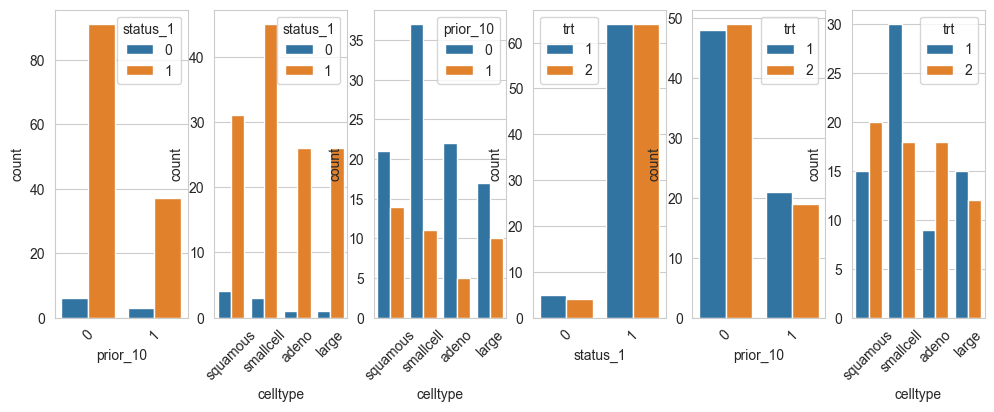

In [31]:
fig,ax = plt.subplots(1,len(output),figsize=(12,4))

for i,v in enumerate(output):
    ax[i].tick_params(axis='x', rotation=45)
    sns.countplot(df,x=df[v[0]],hue=df[v[1]],ax=ax[i])

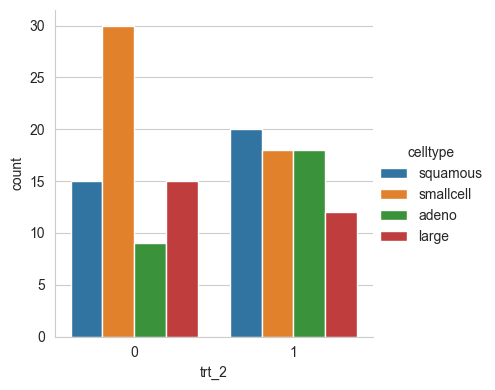

In [32]:
# Alternativa para conteo entre celltype y trt
sns.catplot(data=df, x='trt_2', hue="celltype", kind="count",height=4,aspect=1)

### Tablas dinámicas: Pivot table con pandas
#### Ejemplos de análisis multivariados entre 2 o 3 categóricas
Ver otros ejemplos en https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

Crea una tabla dinámica al estilo de una hoja de cálculo como DataFrame.

Los niveles en la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame de resultado.

Las combinaciones para las tablas dinámicas dependen de las preguntas de investigación

Ejemplo: ¿Está balanceada la cantidad de pacientes que mueren (status =1) por tipo de célula y tratamiento?

In [33]:
# Crear combinaciones para las tablas dinámicas

In [34]:
table = pd.pivot_table(df, values='status_1',  index=['trt'],columns=['celltype'],
                       aggfunc=np.sum,margins=True)
table

celltype,adeno,large,smallcell,squamous,All
trt,,,,,
1,9,14,28,13,64
2,17,12,17,18,64
All,26,26,45,31,128


In [35]:
#sns.catplot?

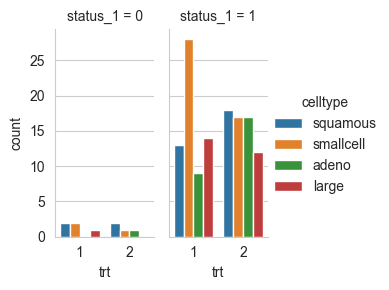

In [36]:
# La tabla anterior (sin los márgenes) se corresponde con la gráfica de la derecha
sns.catplot(data=df, x='trt', col='status_1',hue="celltype", kind="count",height=3,aspect=0.5)

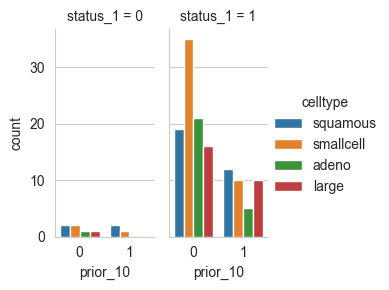

In [37]:
# La tabla anterior (sin los márgenes) se corresponde con la gráfica de la derecha
sns.catplot(data=df, x='prior_10', col='status_1',hue="celltype", kind="count",height=3,aspect=0.5)

### Diagrama de puntos de dos categóricas y de tres categóricas

Un gráfico de puntos representa una estimación de la tendencia central de una variable numérica por la posición del punto y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error.

Los gráficos de puntos pueden ser más útiles que los gráficos de barras para centrar las comparaciones entre diferentes niveles de una o más variables categóricas. Son particularmente hábiles para mostrar interacciones: cómo cambia la relación entre los niveles de una variable categórica a través de los niveles de una segunda variable categórica. Las líneas que unen cada punto del mismo nivel de tonalidad permiten juzgar las interacciones por diferencias de pendiente, lo que es más fácil para los ojos que comparar las alturas de varios grupos de puntos o barras.

__Para conjuntos de datos en los que 0 no es un valor significativo__, un __gráfico de puntos__ le permitirá centrarse en las __diferencias entre los niveles de una o más variables categóricas__. 

<Figure size 400x300 with 0 Axes>

<AxesSubplot: xlabel='celltype', ylabel='trt'>

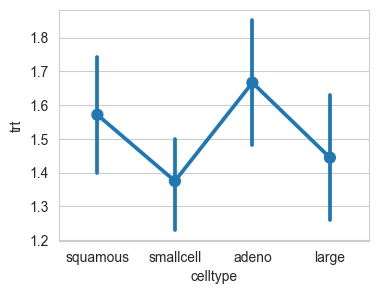

In [38]:
plt.figure(figsize=(4,3))

sns.pointplot(data=df, x="celltype", y="trt",dodge=True) # dodge evita la superposición al graficar

<Figure size 400x300 with 0 Axes>

<AxesSubplot: xlabel='celltype', ylabel='trt'>

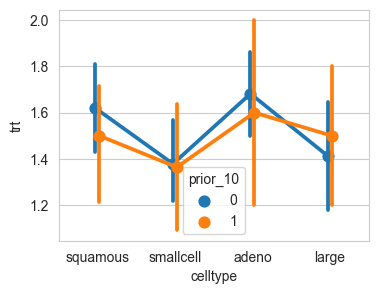

In [39]:
plt.figure(figsize=(4,3))

sns.pointplot(data=df, x="celltype", y="trt",hue='prior_10',dodge=True) # dodge evita la superposición al graficar

### Análisis bivariado entre categóricas y numéricas

+ Usaremos primero pivot table y visualizaciones
+ En otro notebook veremos Análisis de Varianza (ANOVA)

In [40]:
ik = pd.qcut(df['karno'], 4)
table4 = df.pivot_table('time', ['trt',ik])
table4

time
trt karno                    
1   (9.999, 40.0]   54.611111
    (40.0, 60.0]   129.545455
    (60.0, 75.0]   166.181818
    (75.0, 99.0]   126.888889
2   (9.999, 40.0]   26.600000
    (40.0, 60.0]    98.052632
    (60.0, 75.0]   184.000000
    (75.0, 99.0]   249.800000

In [41]:
df['karno_bin'] = ik

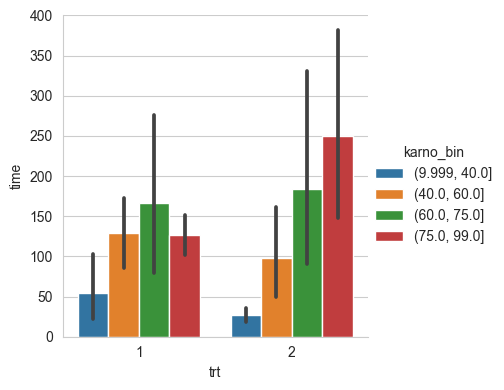

In [42]:
# Muestra la tabla anterior, adicionando las barras de dispersión
sns.catplot(data=df, x='trt',y='time', hue='karno_bin', kind="bar",height=4,aspect=1)

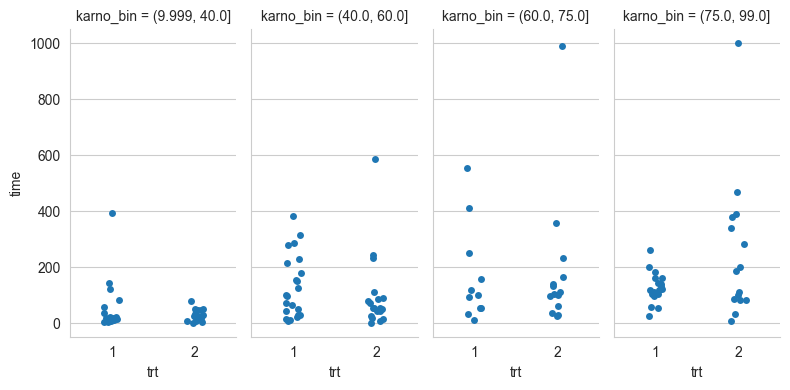

In [43]:
sns.catplot(data=df, x='trt',y='time', col='karno_bin',height=4,aspect=0.5) # el tipo es stripplot

In [44]:
edad = pd.qcut(df['age'], 4)
df.pivot_table('time', ['trt',edad])

time
trt age                       
1   (33.999, 51.0]  145.684211
    (51.0, 62.0]     85.277778
    (62.0, 66.0]    135.555556
    (66.0, 81.0]     85.857143
2   (33.999, 51.0]  116.312500
    (51.0, 62.0]    182.047619
    (62.0, 66.0]    121.400000
    (66.0, 81.0]     75.812500

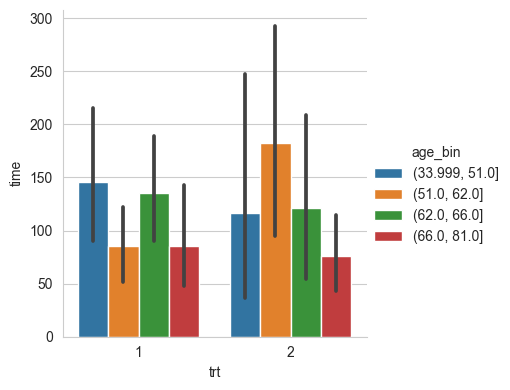

In [45]:
df['age_bin'] = edad
sns.catplot(data=df, x='trt',y='time', hue='age_bin', kind="bar",height=4,aspect=1)

In [46]:
# Pregunta de investigación: ¿Cuál es el promedio de edad de los pacientes en cada tipo de tratamiento?
table1 = pd.pivot_table(df, values='age',  index=['trt']).round(2)
table1

,age
trt,
1,57.51
2,59.12


In [47]:
# Pregunta de investigación: ¿Cuál es el promedio de edad de los pacientes en cada tipo de tratamiento, separando a los que tuvieron o no tratamiento previo?
table2 = pd.pivot_table(df, values='age',  index=['trt'],columns=['prior_10'] ).round(2)
table2

prior_10,0,1
trt,,
1,57.19,58.24
2,60.73,54.95


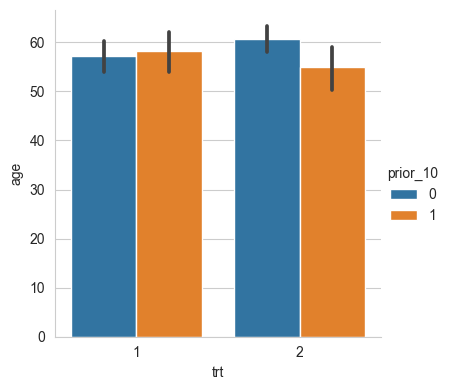

In [48]:
sns.catplot(data=df, x='trt',y='age', hue='prior_10', kind="bar",height=4,aspect=1)

In [49]:
# Pregunta de investigación: ¿Cuál es el promedio de días de vida desde que entraron al estudio de los pacientes en cada tipo de tratamiento,
# separando a los que tuvieron o no tratamiento previo?
table3 = pd.pivot_table(df, values='time',  index=['trt','prior_10'] ).round(2)
table3

time
trt prior_10        
1   0         121.00
    1         101.76
2   0         103.49
    1         191.95

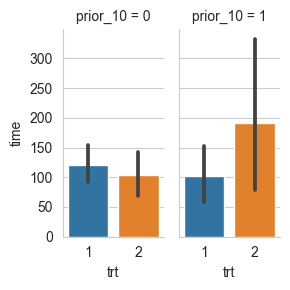

In [50]:
# La tabla anterior se corresponde con la gráfica siguiente, que además contiene una barra de dispersión
sns.catplot(data=df, x='trt', y='time',col='prior_10', kind='bar',height=3,aspect=0.5)

<AxesSubplot: xlabel='time', ylabel='karno'>

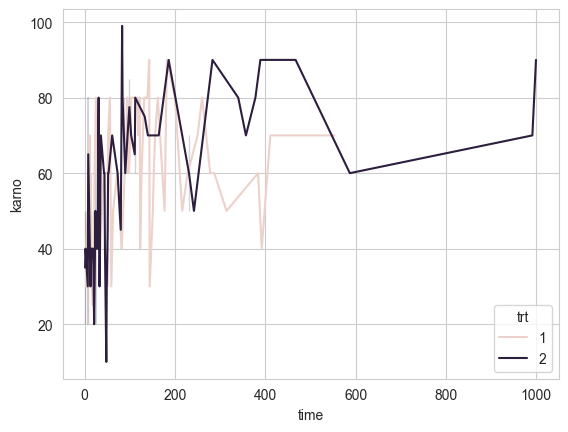

In [51]:
# Graficar la cantidad de muertes por día para cada tratamiento
sns.lineplot(data=df, x="time", y="karno", hue='trt')

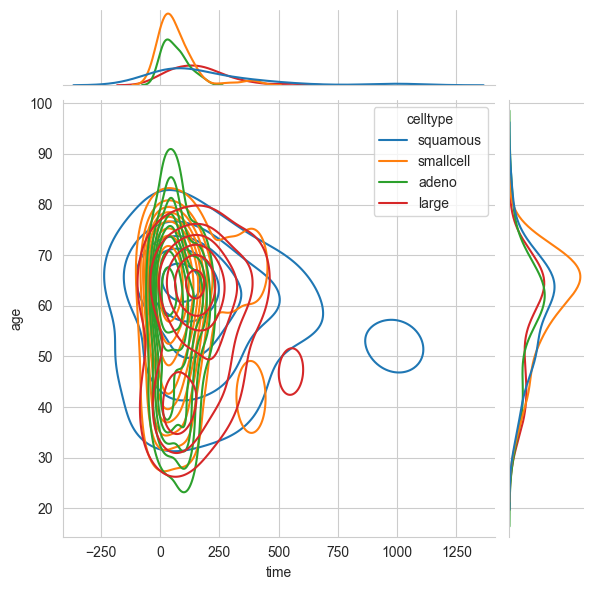

In [52]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",kind="kde")


### Interpretación
+ La mayor densidad de muertes tempranas es para pacientes con célula smallcell, seguido de adeno
+ El rango de edades más amplio es el de pacientes con célula adeno y tiene al los más longevos (pasados los 90 años)

### Limita a no graficar tiempo transcurrido menos de 0

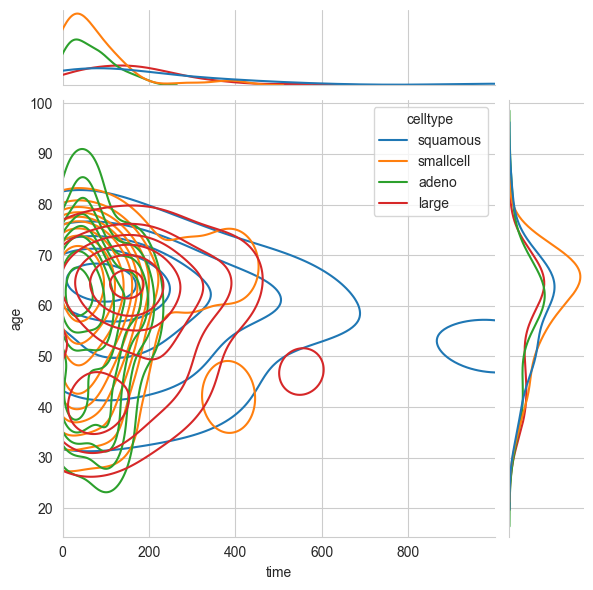

In [53]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",xlim=(0,df.time.max()),kind="kde")


### Interpretación

+ La mayoría de los pacientes tiene entre 60 y 70 años

### Relación entre dos categóricas y una numérica usando relplot()

In [54]:
df.columns

Index(['trt', 'prior', 'celltype', 'trt.1', 'prior.1', 'time', 'karno',
       'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10', 'celltype_large.1',
       'celltype_smallcell.1', 'celltype_squamous.1', 'karno_bin', 'age_bin'],
      dtype='object')

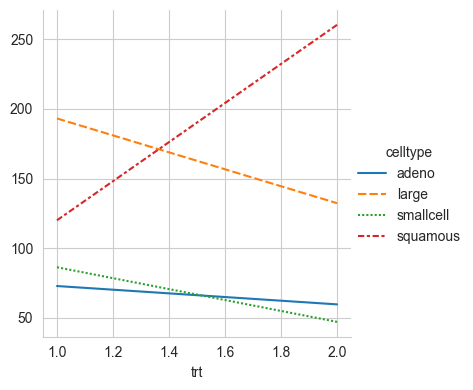

In [55]:
ff = df[["celltype","trt","time"]]
cell_time = ff.pivot_table(index="trt",columns= "celltype",values="time")
sns.relplot(data=cell_time, kind="line",height=4)

### Interpretación

+ Para adeno y large y small cell el tiempo de muerte desciende con tratamiento 2
+ Para squamous el tiempo de muerte asciende con tratamiento 2, por lo que solo en este caso parece ser efectivo este tratamiento



### Diagrama de violín

+ Útil para analizar conjuntamente variables categóricas y numéricas

Un diagrama de violín juega un papel similar al de un diagrama de caja y bigotes. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones puedan compararse.__A diferencia de un diagrama de caja__, en el que todos los componentes del diagrama corresponden a puntos de datos reales, el diagrama de violín __presenta una estimación de la densidad del núcleo de la distribución subyacente__.

Esta puede ser una forma eficaz y atractiva de mostrar múltiples distribuciones de datos a la vez, pero tenga en cuenta que el procedimiento de estimación está influenciado por el tamaño de la muestra, y los violines para muestras relativamente pequeñas pueden parecer engañosamente fluidos.

También es importante tener en cuenta que un diagrama de barras muestra solo el valor medio (u otro estimador), pero en muchos casos __puede ser más informativo mostrar la distribución de valores en cada nivel de las variables categóricas__. En ese caso, otros enfoques, como un __diagrama de caja o de violín__, pueden ser más apropiados.

<Figure size 500x300 with 0 Axes>

<AxesSubplot: xlabel='celltype', ylabel='karno'>

<AxesSubplot: xlabel='celltype', ylabel='karno'>

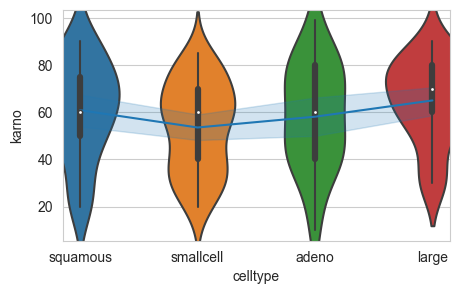

In [56]:
# entre celltype y karno
plt.figure(figsize=(5,3))
sns.violinplot(x=df["celltype"],y=df["karno"])
sns.lineplot(x=df["celltype"],y=df["karno"]) # agrega las medias y sombreado el intervalo con las desviaciones
plt.show()

<Figure size 500x400 with 0 Axes>

<AxesSubplot: xlabel='celltype', ylabel='karno'>

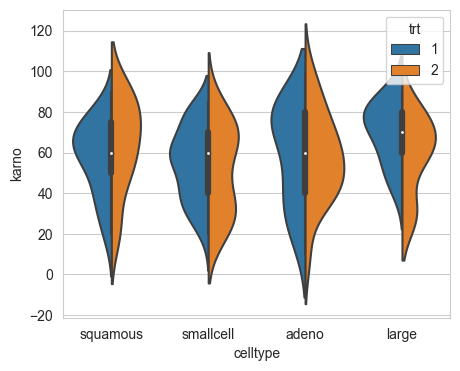

In [57]:
plt.figure(figsize=(5,4))
sns.violinplot(x=df["celltype"],y=df["karno"],hue=df["trt"], split=True)


### Análisis bivariado entre numéricas

+ __jointplot()__ de seaborn es un método especializado en gráficos bivariados. El primer diagrama que se muestra a continuación con jointplot(), grafica las distribuciones marginales de cada variable y el diagrama de dispersión de la distribución conjunta

+ __relplot()__ Interfaz a nivel de figura para dibujar diagramas relacionales en un FacetGrid.

     Esta función brinda acceso a varias funciones a nivel de ejes diferentes que muestran la relación entre dos variables con asignaciones semánticas de subconjuntos. El parámetro kind selecciona la función de nivel de ejes subyacente para usar:

        + diagrama de dispersión() (con kind="scatter"; el valor predeterminado)

        + lineplot() (con kind="line")


#### Combinaciones de a 2 de variables numéricas:
+ karno-age
+ karno-time
+ karno-diagtime
+ age-time
+ age-diagtime
+ time-diagtime

In [58]:
#sns.jointplot?
#sns.relplot?

#### Relación karno-age

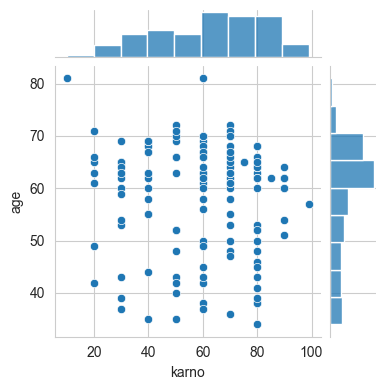

In [59]:

sns.jointplot(data=df, x="karno", y="age", height=4)

### Interpretación
+ Entre karno y age no hay relación lineal, ni aumentan o disminuyen conjuntamente

#### Relación karno-time

+ El primer gráfico ya se había visualizado al inicio de este notebook en el pairplot().
+ Si colocamos el tiempo por eje de las x y usamos el tipo line observaremos dos series de tiempo. Aquí se escogió hue='trt'

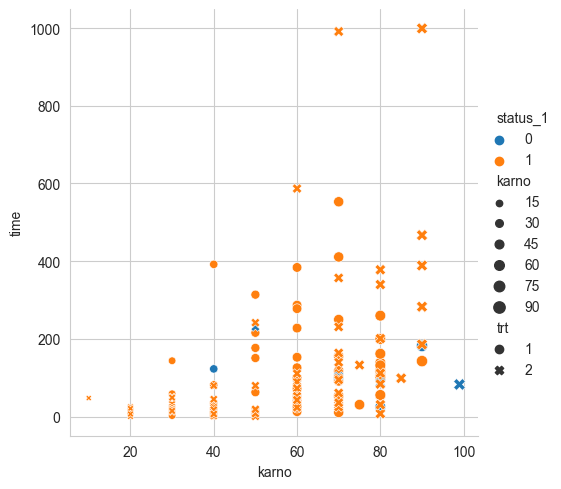

In [60]:
sns.relplot(data=df, x="karno", y="time", hue="status_1",height=5,size="karno", style="trt")

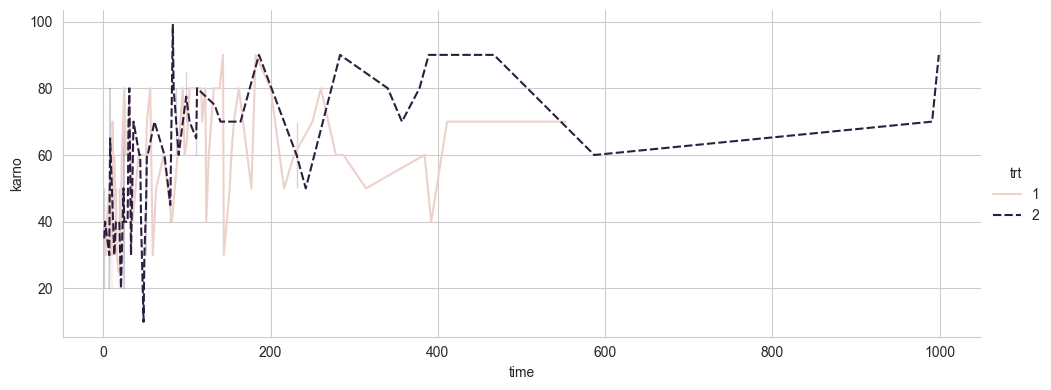

In [61]:
sns.relplot(data=df, x="time", y="karno", hue="trt",kind='line',style="trt",height=4,aspect=2.5)

### box plot entre karno (cardinalidad media) y time

<AxesSubplot: xlabel='karno', ylabel='time'>

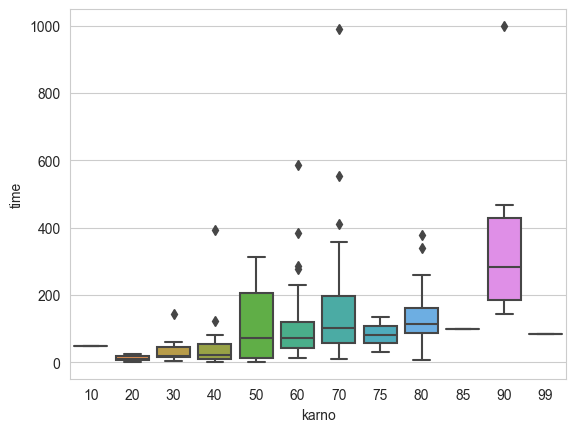

In [62]:
sns.boxplot(data=df,x='karno',y='time')


####  Relación karno-diagtime

+ karno tiene mucha dispersión con los diagnósticos tempranos

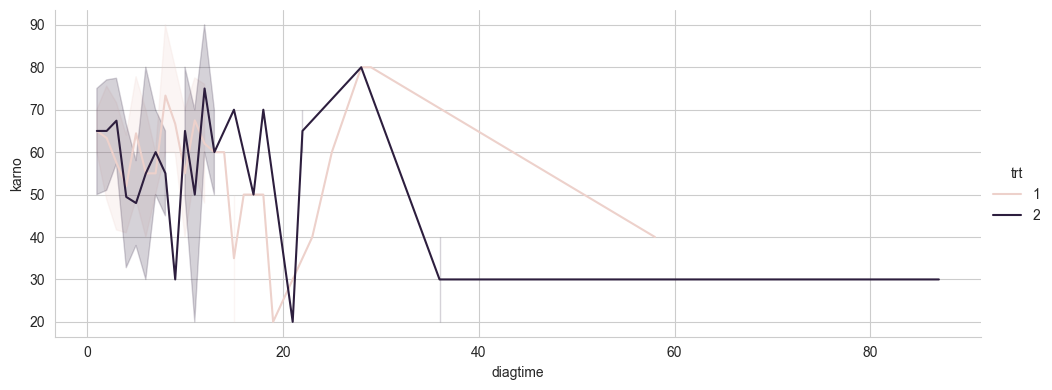

In [63]:

sns.relplot(data=df, x="diagtime", y="karno", hue="trt",kind='line',height=4,aspect=2.5)

####  Relación age-time

+ En el primer gráfico se añade al gráfico de dispersión la línea de regresión y a las distribuciones marginales se adiciona la densidad
+ En el segundo gráfico se hace un arreglo de subplots

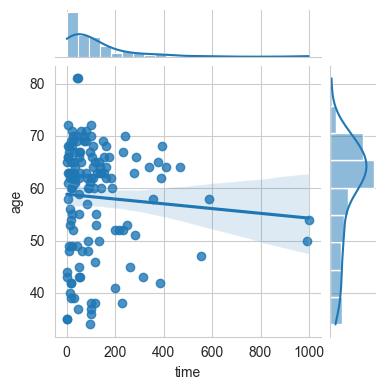

In [64]:
sns.jointplot(data=df, x="time", y="age",kind="reg",height=4)

### Interpretación

+ La mayoría murió antes de los 200 días
+ La mayoría de los pacientes tiene entre 60 y 70 años

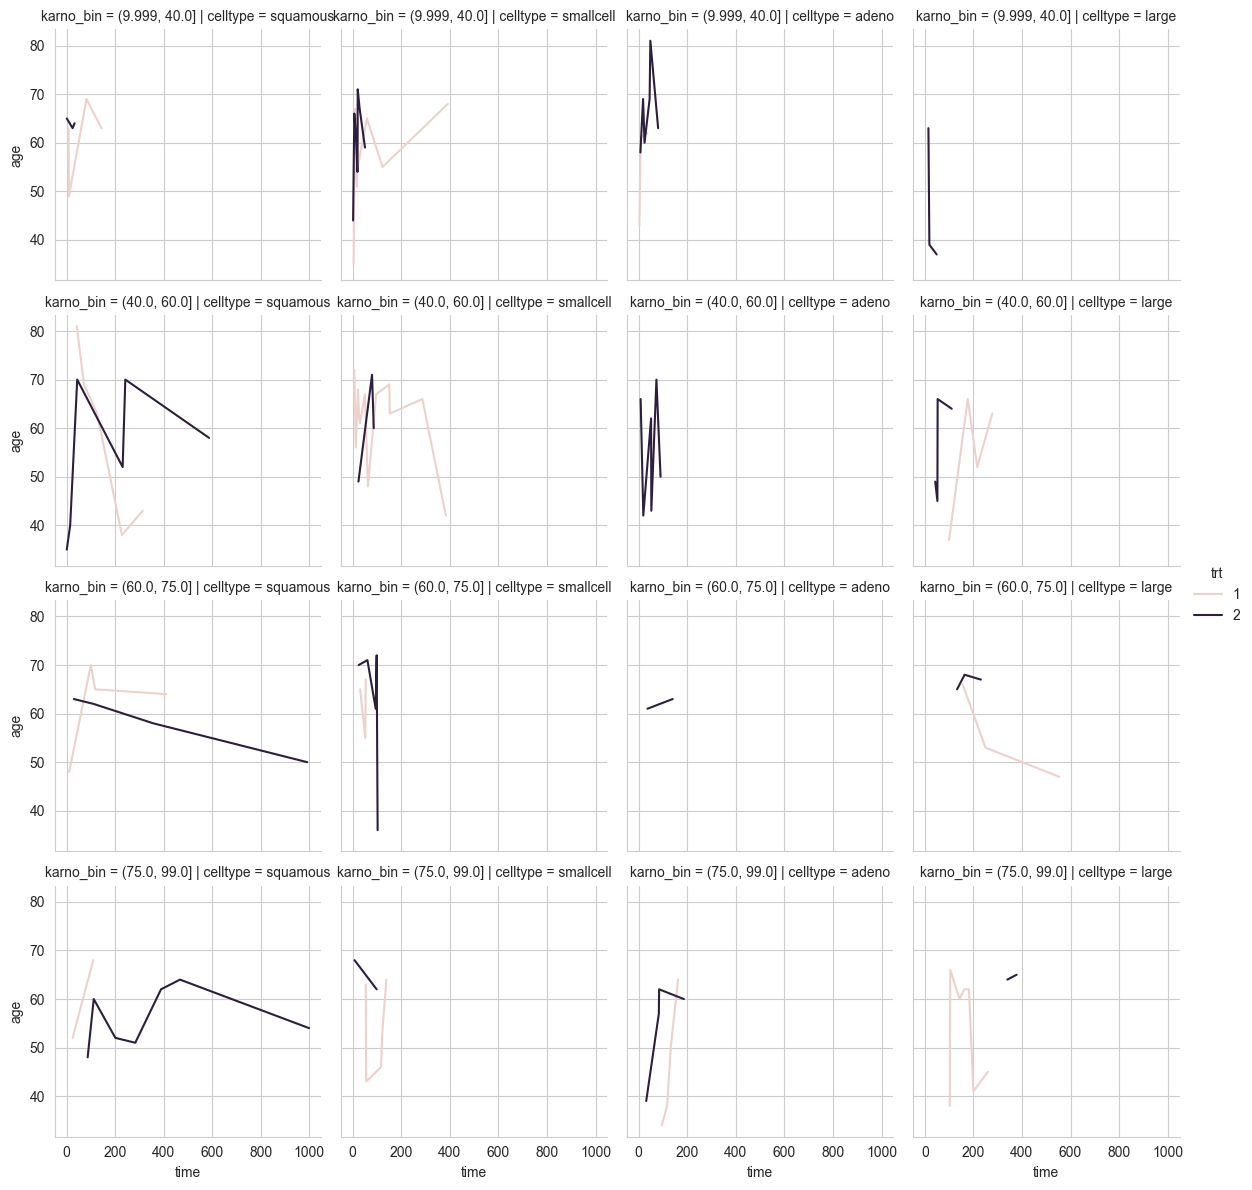

In [65]:

sns.relplot(data=df, x="time", y="age", hue="trt", row="karno_bin", col="celltype",kind='line',height=3,aspect=1)

#### age-diagtime

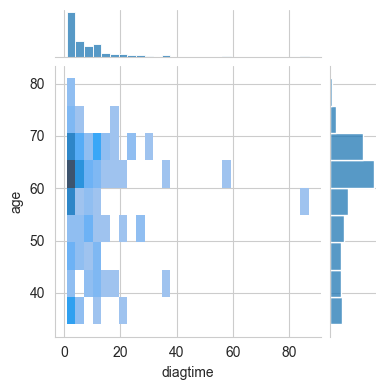

In [66]:
sns.jointplot(data=df, x="diagtime", y="age",kind="hist",height =4)

### Interpretación

+ El cuadro más oscuro indica la mayor concentración de edad con tiempo de diagnóstico que es entre 60 y 65 años en la primera semana del estudio

#### time-diagtime

In [67]:
df.diagtime.mean()

8.773722627737227

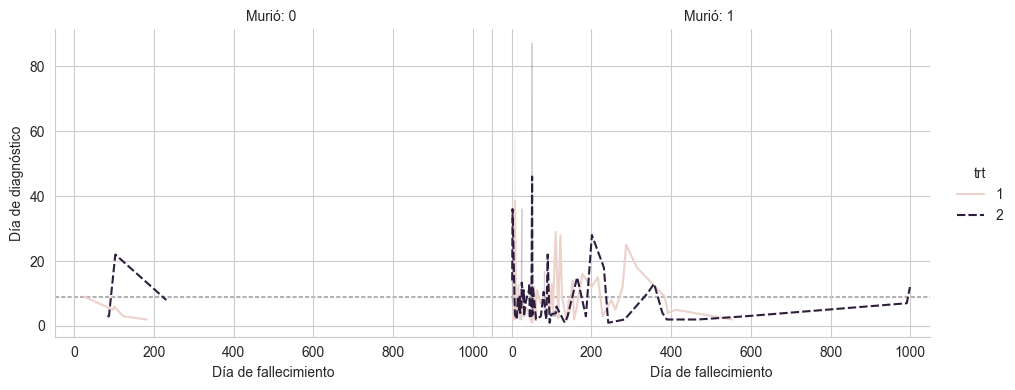

In [68]:
g = sns.relplot(
    data=df,
    x="time", y="diagtime",
    hue="trt", style="trt", col="status_1",
    height=4, aspect=1.2, kind="line"
)
# línea horizontal para la media de diagtime
(g.map(plt.axhline, y=df.diagtime.mean(), color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Día de fallecimiento", "Día de diagnóstico")
  .set_titles("Murió: {col_name} ")
  .tight_layout(w_pad=0))


In [69]:
df.time[df.trt == 1].describe()

count     69.000000
mean     115.144928
std      112.739715
min        3.000000
25%       25.000000
50%       97.000000
75%      153.000000
max      553.000000
Name: time, dtype: float64

In [70]:
df.time[df.trt == 2].describe()

count     68.000000
mean     128.205882
std      193.826092
min        1.000000
25%       24.750000
50%       52.500000
75%      117.250000
max      999.000000
Name: time, dtype: float64

In [71]:
df.trt.value_counts(normalize=True)

1    0.50365
2    0.49635
Name: trt, dtype: float64

In [72]:
cel_count = df.celltype.value_counts()
cel_count

smallcell    48
squamous     35
adeno        27
large        27
Name: celltype, dtype: int64

In [73]:
cel_count.values

array([48, 35, 27, 27], dtype=int64)

In [74]:
prop_cel = df.celltype.value_counts(normalize=True)
prop_cel

smallcell    0.350365
squamous     0.255474
adeno        0.197080
large        0.197080
Name: celltype, dtype: float64

### Diagrama de puntos de dos categóricas y una de razón


<Figure size 400x300 with 0 Axes>

<AxesSubplot: xlabel='celltype', ylabel='karno'>

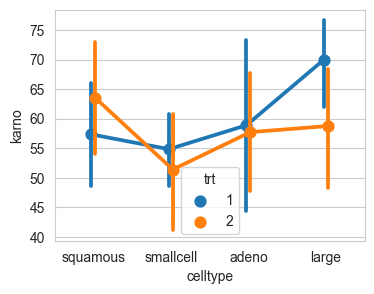

In [75]:
plt.figure(figsize=(4,3))

sns.pointplot(data=df, x="celltype", y="karno",hue='trt',dodge=True) # dodge evita la superposición al graficar

### Interpretación

+ La puntuación de karno es, como promedio, menor para los del tratamiento 2 que para los del tratamiento 1, excepto para las células de tipo squamous
+ La mayor diferencia se encuentra en los pacientes con células de tipo large, donde la puntuación karno es mucho mayor para los de tratamiento 1. Por el contrario, en pacientes con células tipo squamous, el karno es mucho mayor, como promedio con el tratamiento 2.
+ Se grafica la media del karno para cada tipo de célula, observando que la media mayor es del tipo large y la menor es la de smallcell 
+ Los que tienen cáncer de célula pequeña tienen una menor calidad de vida diaria como promedio.

### Guardar dataset con dummies y nuevas características

+ Hay nuevas columnas categóricas, después de hacer "binning" de algunas continuas
+ Hay nuevas columnas de razón después de aplicar una transformación logarítmica


In [76]:

df

,trt,prior,celltype,trt.1,prior.1,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10,celltype_large.1,celltype_smallcell.1,celltype_squamous.1,karno_bin,age_bin
0,1,0,squamous,1,0,72,60,7,69,0,0,0,1,1,0,0,0,1,"(40.0, 60.0]","(66.0, 81.0]"
1,1,10,squamous,1,10,411,70,5,64,0,0,0,1,1,1,0,0,1,"(60.0, 75.0]","(62.0, 66.0]"
2,1,0,squamous,1,0,228,60,3,38,0,0,0,1,1,0,0,0,1,"(40.0, 60.0]","(33.999, 51.0]"
3,1,10,squamous,1,10,126,60,9,63,0,0,0,1,1,1,0,0,1,"(40.0, 60.0]","(62.0, 66.0]"
4,1,10,squamous,1,10,118,70,11,65,0,0,0,1,1,1,0,0,1,"(60.0, 75.0]","(62.0, 66.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,0,large,2,0,133,75,1,65,1,1,0,0,1,0,1,0,0,"(60.0, 75.0]","(62.0, 66.0]"
133,2,0,large,2,0,111,60,5,64,1,1,0,0,1,0,1,0,0,"(40.0, 60.0]","(62.0, 66.0]"
134,2,10,large,2,10,231,70,18,67,1,1,0,0,1,1,1,0,0,"(60.0, 75.0]","(66.0, 81.0]"
135,2,0,large,2,0,378,80,4,65,1,1,0,0,1,0,1,0,0,"(75.0, 99.0]","(62.0, 66.0]"


## Guardar archivo con características originales y nuevas

In [77]:
df.to_csv('dataset-25346_dum_feat.csv',index=False,encoding='utf-8')